# SWEET Vetting Example

SWEET is the Sine Wave Event Evaluation Test and determines if the TCE under evaluation is actually due to a star's inherent pulsations or due to ellipsoidal variability.  SWEET looks for strong sinusoidal signal at the period of the TCE and at half and twice that period.


In [1]:
from exovetter.tce import Tce
from exovetter import vetters as vet
from exovetter import const as exo_const
import lightkurve as lk
from astropy import units as u
import matplotlib.pyplot as plt
%matplotlib inline

## Setup
Exovetter vetting alogrithms use TCE and lightkurve objects as input

In [2]:
# WASP-18 b TCE:
period = 0.94145223 * u.day
epoch = 1354.4579 * u.day
epoch_offset = exo_const.btjd
depth = 0.00931894 * exo_const.frac_amp
duration = 0.08932 * u.day

# create a TCE object using the exovetter.tce.Tce class
tce = Tce(period=period, epoch=epoch, epoch_offset=epoch_offset, 
          depth=depth, duration=duration, comment='example')

tce

{'period': <Quantity 0.94145223 d>,
 'epoch': <Quantity 1354.4579 d>,
 'epoch_offset': <Quantity -2457000. d>,
 'depth': <Quantity 0.00931894>,
 'duration': <Quantity 0.08932 d>,
 'comment': 'example'}

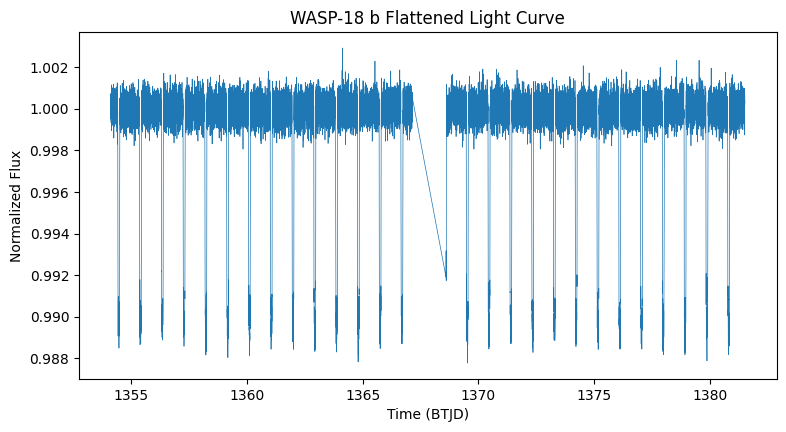

In [3]:
# Read in the flattened WASP-18 b lightkurve object
lc = lk.read('wasp18b.fits')

# plot light curve
plt.figure(figsize=(9,4.5))
plt.plot(lc.time.value, lc.flux.value, lw=0.5) 
plt.title('WASP-18 b Flattened Light Curve')
plt.xlabel('Time (BTJD)')
plt.ylabel('Normalized Flux')
plt.show()

# Vetting
Vetters are run by first creating an instance of the vetter object in order to specify parameters to desired values then running the object to obtain the results. Here we use the default options (hence the lack of arguments to `vet.Sweet`). 

In order to run the initialized vetter we use the `run` method which takes a TCE and a lightkurve object as inputs. This returns a dictionary of results.

In [4]:
sweet_instance = vet.Sweet()
sweet_results = sweet_instance.run(tce, lc)

sweet_results

{'msg': 'OK: SWEET finds no out-of-transit variability at transit period',
 'amp': array([[6.66440271e-07, 5.83201791e-06, 1.14272672e-01],
        [8.90857608e-07, 5.83201641e-06, 1.52752932e-01],
        [1.93617963e-06, 5.83200160e-06, 3.31992300e-01]])}

In SWEET, the results are as follows: "**Better description of these values and their use"**
* msg : contains warnings, if applicable.
* amp : contains the best fit amplitude, its uncertainty, and amplitude-to-uncertainty ratio for half-period, period, and twice the period.            

The following attributes are also available after running the vetter object:
* metrics : SWEET result dictionary.

## Plots
In order to generate diagnostic plots from vetters, we use the `plot` method with the vetter object after it has been run.

<Figure size 640x480 with 0 Axes>

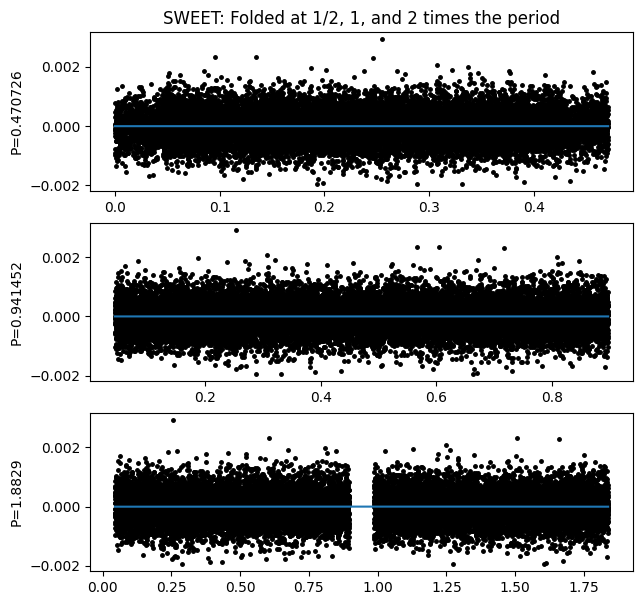

In [5]:
plt.figure()
sweet_instance.plot()
plt.show()

The same plots are made when using `plot=True` during the `run` method.

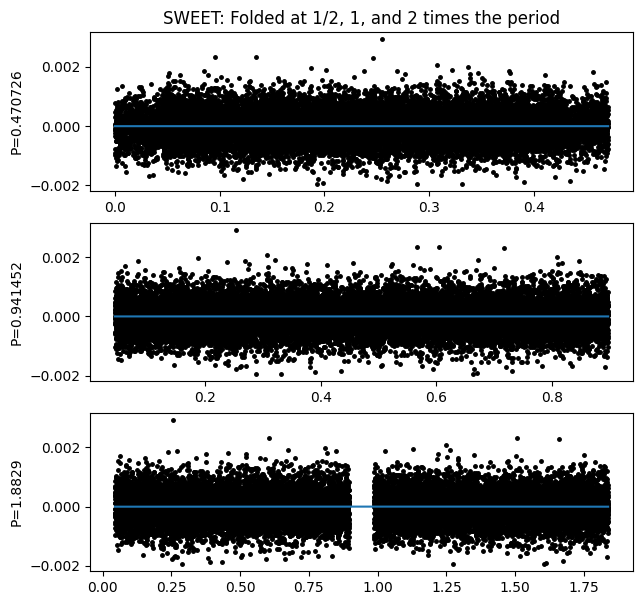

In [6]:
sweet_results = sweet_instance.run(tce, lc, plot=True)